# Analyzing the Datas

In [1]:
# Import all the necessary liabraries
import numpy as np 
np.set_printoptions(suppress=True)
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clr
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from mpl_toolkits.mplot3d import Axes3D
import folium
import branca
import warnings
warnings.filterwarnings('ignore')

print('Libraries imported.')

Libraries imported.


## 1. Preprocessing

In [2]:
#Load the Final Data
%store -r data_final
df_final = data_final
print(df_final.shape)
df_final.head()

(279, 8)


,Sta_ID,Alight_Num,Sta_Name_,X_Coor,Y_Coor,Addr,Fee_Space,Cafe_Count
0,150,3110466,서울,37.55,126.97,서울특별시 용산구 동자동,947.79,19
1,151,1759078,시청,37.56,126.98,서울특별시 중구 태평로2가,673.18,21
2,152,1361926,종각,37.57,126.98,서울특별시 종로구 종로1가,1188.83,38
3,153,1979876,종로3가,37.57,126.99,서울특별시 종로구 묘동,852.82,20
4,154,874720,종로5가,37.57,127.00,서울특별시 종로구 종로5가,895.91,28


In [3]:
#Get only the columns used for clustering
df_preprocessing = df_final[['Alight_Num','Fee_Space','Cafe_Count']]
df_preprocessing.head()

,Alight_Num,Fee_Space,Cafe_Count
0,3110466,947.79,19
1,1759078,673.18,21
2,1361926,1188.83,38
3,1979876,852.82,20
4,874720,895.91,28


In [4]:
#Standardize the values
X = df_preprocessing.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = MinMaxScaler().fit_transform(X)
cluster_dataset[:10]

array([[0.96191361, 0.46112632, 0.3877551 ],
       [0.54010167, 0.29552618, 0.42857143],
       [0.41613768, 0.60647953, 0.7755102 ],
       [0.60901988, 0.40385493, 0.40816327],
       [0.26406492, 0.42983982, 0.57142857],
       [0.40390084, 0.48311337, 0.24489796],
       [0.20667657, 0.18203372, 0.12244898],
       [0.19963705, 0.11448027, 0.04081633],
       [0.43163224, 0.19578207, 0.12244898],
       [0.21120686, 0.26428154, 0.18367347]])

## 2. Clustering

In [6]:
#Calculate silhouette_score to find the optimal k for k-means clustering
n=range(3,10)
m=range(10) # Average 10 times for each k to reduce randomness
y=[]
for n_clusters in n:
    score=0
    for count in m:
        clusterer = KMeans (n_clusters=n_clusters, n_init=20)
        preds = clusterer.fit_predict(cluster_dataset)
        score = score + silhouette_score (cluster_dataset, preds, metric='euclidean')
    y.append(score/10)
y

[0.41054858823852136,
 0.4049918053758468,
 0.4114914583596304,
 0.3459899179764079,
 0.3524814152504974,
 0.293588892141138,
 0.2892271250383016]

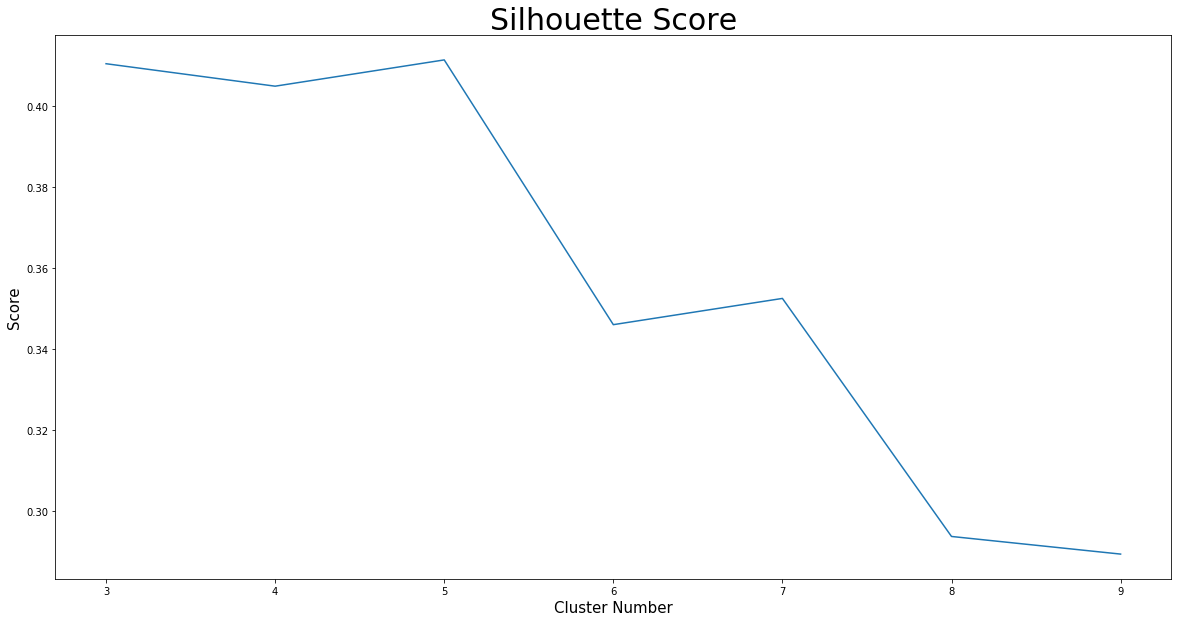

In [7]:
#Plot the silhoutte score, higher the better
plt.figure(figsize=(20,10))
plt.plot(range(3,10), y)
plt.title('Silhouette Score', fontsize=30)
plt.xlabel('Cluster Number', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()

In [8]:
#Kmeans cluster, k=5
num_clusters = 5 

k_means = KMeans(n_clusters=num_clusters, n_init=20)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[3 3 1 3 4 0 2 2 3 2 1 0 0 0 2 4 4 2 4 2 1 2 3 4 3 4 0 3 1 1 1 1 4 2 3 4 3
 4 3 4 3 2 3 2 4 3 1 1 1 1 0 4 2 0 2 2 2 2 4 4 4 2 2 2 2 4 4 4 0 4 2 2 4 1
 0 1 4 3 2 2 4 0 2 2 1 2 2 2 2 2 3 4 4 4 2 4 0 4 2 1 1 0 4 0 4 0 2 4 2 2 1
 3 2 3 2 0 2 4 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 4 1 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2 1 2 4 0 4 1 0 2 2 2 0 0 4 2 2 1 2
 2 2 4 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 2 4 0 1 0 0 0 0 4 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 4 0 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 4 2 2 2 4 0 0 0 1 4 0 4]


In [9]:
#Create an array with values and their cluster for visualization
cluster_arr = np.insert(cluster_dataset, 3, labels, axis=1)
cluster_arr[:10]

array([[0.96191361, 0.46112632, 0.3877551 , 3.        ],
       [0.54010167, 0.29552618, 0.42857143, 3.        ],
       [0.41613768, 0.60647953, 0.7755102 , 1.        ],
       [0.60901988, 0.40385493, 0.40816327, 3.        ],
       [0.26406492, 0.42983982, 0.57142857, 4.        ],
       [0.40390084, 0.48311337, 0.24489796, 0.        ],
       [0.20667657, 0.18203372, 0.12244898, 2.        ],
       [0.19963705, 0.11448027, 0.04081633, 2.        ],
       [0.43163224, 0.19578207, 0.12244898, 3.        ],
       [0.21120686, 0.26428154, 0.18367347, 2.        ]])

In [10]:
#For color
colors = cm.rainbow(np.linspace(0, 1, num_clusters))
cluster_labels = list(range(0, num_clusters))

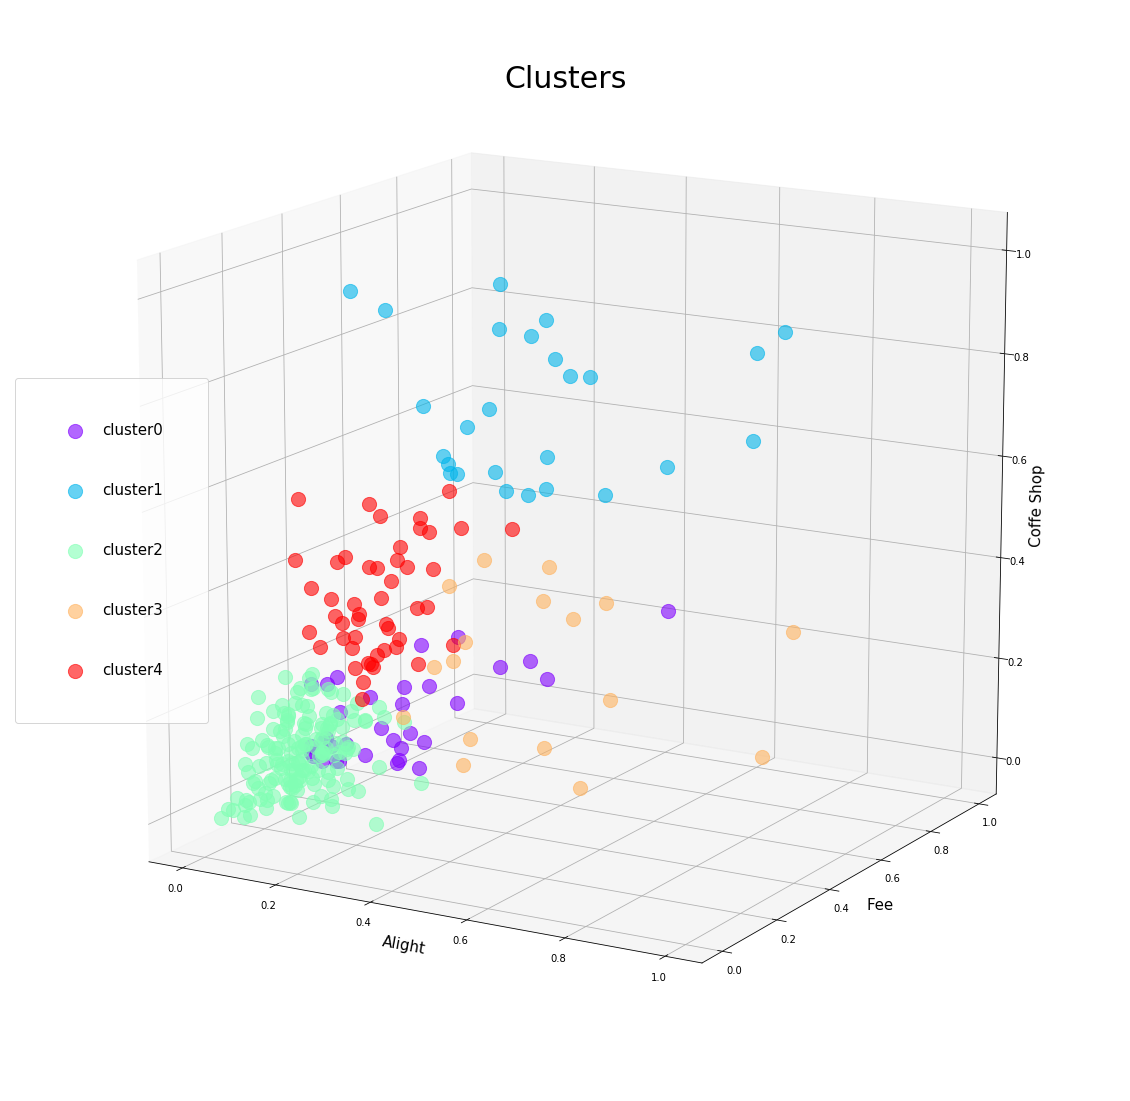

In [11]:
#Visualize
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

for color, label in zip(colors, cluster_labels):
    legend_count=0
    for i in range(0,cluster_arr.shape[0]):
        if cluster_arr[i][3]==float(label) and legend_count==0:
            ax.scatter(cluster_arr[i][0], cluster_arr[i][1], cluster_arr[i][2], s=200, c=color, label='cluster'+str(label), alpha=0.6)
            legend_count = 1
        elif cluster_arr[i][3]==float(label):
            ax.scatter(cluster_arr[i][0], cluster_arr[i][1], cluster_arr[i][2], s=200, c=color, alpha=0.6)

ax.legend(loc='center left', borderpad=3, labelspacing=3, fontsize=15)
ax.set_title('Clusters', fontsize=30)
ax.set_xlabel('Alight', fontsize=15)
ax.set_ylabel('Fee', fontsize=15)
ax.set_zlabel('Coffe Shop', fontsize=15)
ax.view_init(15)
plt.show()

In [12]:
# Add column for cluster
df_final.insert(0, 'Cluster_Labels', labels)
print(df_final.shape)
df_final

(279, 9)


,Cluster_Labels,Sta_ID,Alight_Num,Sta_Name_,X_Coor,Y_Coor,Addr,Fee_Space,Cafe_Count
0,3,150,3110466,서울,37.55,126.97,서울특별시 용산구 동자동,947.79,19
1,3,151,1759078,시청,37.56,126.98,서울특별시 중구 태평로2가,673.18,21
2,1,152,1361926,종각,37.57,126.98,서울특별시 종로구 종로1가,1188.83,38
3,3,153,1979876,종로3가,37.57,126.99,서울특별시 종로구 묘동,852.82,20
4,4,154,874720,종로5가,37.57,127.00,서울특별시 종로구 종로5가,895.91,28


In [27]:
df_final

,Cluster_Labels,Sta_ID,Alight_Num,Sta_Name_,X_Coor,Y_Coor,Addr,Fee_Space,Cafe_Count
0,3,150,3110466,서울,37.55,126.97,서울특별시 용산구 동자동,947.79,19
1,3,151,1759078,시청,37.56,126.98,서울특별시 중구 태평로2가,673.18,21
2,1,152,1361926,종각,37.57,126.98,서울특별시 종로구 종로1가,1188.83,38
3,3,153,1979876,종로3가,37.57,126.99,서울특별시 종로구 묘동,852.82,20
4,4,154,874720,종로5가,37.57,127.00,서울특별시 종로구 종로5가,895.91,28
5,0,155,1322722,동대문,37.57,127.01,서울특별시 종로구 종로6가,984.26,12
6,2,156,690861,신설동,37.58,127.03,서울특별시 동대문구 신설동,484.97,6
7,2,157,668308,제기동,37.58,127.03,서울특별시 동대문구 용두동,372.95,2
8,3,158,1411567,청량리,37.58,127.05,서울특별시 동대문구 전농동,507.77,6
9,2,159,705375,동묘앞,37.57,127.02,서울특별시 종로구 숭인동,621.36,9


## 3. Analyze

Text(0, 0.5, 'Rents')

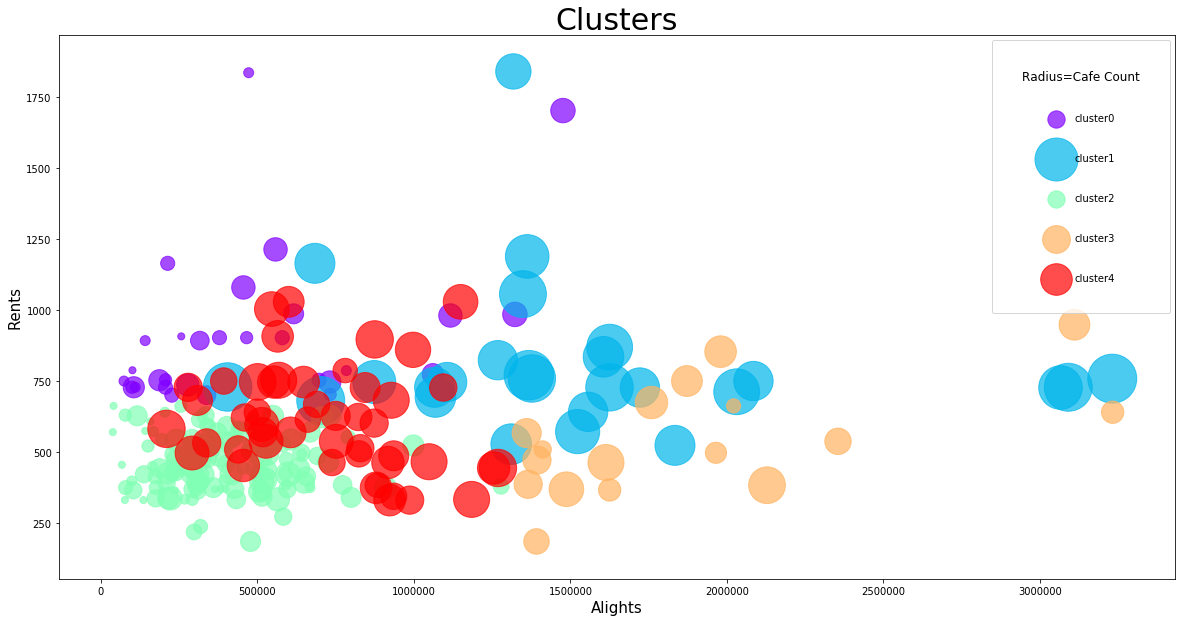

In [13]:
#Visualize the clusters in 2D with original values
plt.figure(figsize=(20,10))

for color, label in zip(colors, cluster_labels):
    subset = df_final[df_final.Cluster_Labels == label]
    plt.scatter(subset.Alight_Num, subset.Fee_Space, s= subset.Cafe_Count*50, c=color, label='cluster'+str(label),alpha=0.7)

plt.legend(loc='upper right', title='Radius=Cafe Count',title_fontsize='large', borderpad=3, labelspacing=3)
plt.title('Clusters',fontsize=30)
plt.xlabel('Alights',fontsize=15)
plt.ylabel('Rents',fontsize=15)

In [14]:
#Group and get mean to better understand each clusters
df_mean = df_final.groupby(['Cluster_Labels'])['Alight_Num','Fee_Space','Cafe_Count'].mean()
#Add new columns to help get insights
df_mean['People_per_cafe'] = df_mean['Alight_Num']/df_mean['Cafe_Count'] #Lower the better
df_mean['Cost'] = df_mean['Fee_Space']*100000/df_mean['People_per_cafe'] #Lower the better, timed 100000 because the values were too small
df_mean

,Alight_Num,Fee_Space,Cafe_Count,People_per_cafe,Cost
Cluster_Labels,,,,,
0,444662.91,918.31,5.12,86888.16,1056.89
1,1548157.65,807.99,37.73,41031.70,1969.19
2,372575.06,457.47,5.00,74515.01,613.92
3,1886577.94,543.69,15.94,118346.22,459.40
4,721584.27,612.40,19.38,37243.06,1644.33


Text(0, 0.5, 'Rents')

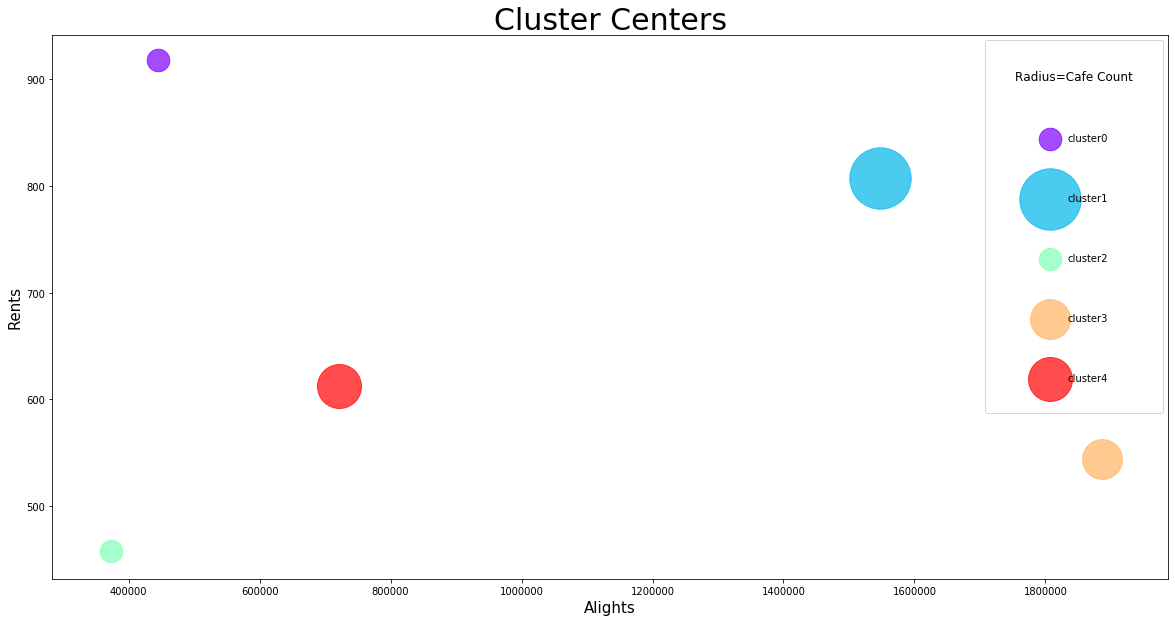

In [16]:
#Visualize the cluster centers
plt.figure(figsize=(20,10))
for color, label in zip(colors, cluster_labels):
    subset = df_mean.loc[(label,),]
    plt.scatter(subset.Alight_Num, subset.Fee_Space, s=subset.Cafe_Count*100, c=color, label='cluster'+str(label),alpha=0.7)
plt.legend(loc='upper right', title='Radius=Cafe Count',title_fontsize='large',borderpad=3, labelspacing=5)
plt.title('Cluster Centers',fontsize=30)
plt.xlabel('Alights',fontsize=15)
plt.ylabel('Rents',fontsize=15)

In [17]:
#Sort by Alight_Num for some order
df_mean.sort_values(by=['Alight_Num'])

,Alight_Num,Fee_Space,Cafe_Count,People_per_cafe,Cost
Cluster_Labels,,,,,
2,372575.06,457.47,5.00,74515.01,613.92
0,444662.91,918.31,5.12,86888.16,1056.89
4,721584.27,612.40,19.38,37243.06,1644.33
1,1548157.65,807.99,37.73,41031.70,1969.19
3,1886577.94,543.69,15.94,118346.22,459.40


##### cluster 2: Lowest people, Lowest rent, Lowest Cafes, Medium People per cafe, Low Cost
##### cluster 0: Low people, Highest rent, Low Cafes, High per cafe, Medium Cost
##### cluster 4: Medium people, Medium rent, High Cafes, Lowest People per cafe, High Cost
##### cluster 1: High people, High rent, Highest Cafes, Low People per cafe, Highest Cost
##### cluster 3: Highest people, Low rent, Medium Cafes, Highest People per cafe, Lowest Cost

## 4. Conclusion

### Cluster to **prefer**  
#### cluster2: Less customers, but has cheap rents and less competition.  
##### - Stations such as: 노들역, 남성역, 동작역
### Cluster to **avoid**  
#### cluster1: Many customers, but has expensive rents and a lot of competitors.  
##### -Stations such as: 강남역, 건대입구역, 신촌역
### **Best** Cluster
#### cluster3: Medium amout of competitors, has a lot of customers and cheap rents.  
##### -Stations such as: 노량진역, 강변역,  신림역

In [32]:
#Create Map
map_seoul = folium.Map(location=[37.5666791, 126.9782914],zoom_start=12,tiles='Stamen Toner')

for clust, lat, lng, label in zip(df_final['Cluster_Labels'],df_final['X_Coor'], df_final['Y_Coor'], df_final['Sta_Name_']):
    label = folium.Popup(label, parse_html=True)
    color = clr.to_hex(colors[int(clust)])
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#000000',
        fill_opacity=1,
        parse_html=False).add_to(map_seoul)  


In [33]:
#For Map Legend
legend_html = '''
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    top: 0px;
    right: -100px;
    width: 250px;
    height: 80px;
    z-index:9999;
    font-size:14px;
    ">
    <p><a style="color:#8000ff;font-size:150%;margin-left:20px;">●</a>&emsp;Cluster 0</p>
    <p><a style="color:#00b5eb;font-size:150%;margin-left:20px;">●</a>&emsp;Cluster 1</p>
    <p><a style="color:#80ffb4;font-size:150%;margin-left:20px;">●</a>&emsp;Cluster 2</p>
    <p><a style="color:#ffb360;font-size:150%;margin-left:20px;">●</a>&emsp;Cluster 3</p>
    <p><a style="color:#ff0000;font-size:150%;margin-left:20px;">●</a>&emsp;Cluster 4</p>
</div>
<div style="
    position: fixed; 
    top: 0px;
    right: 0px;
    width: 150px;
    height: 200px; 
    z-index:9998;
    font-size:14px;
    background-color: #E0FFFF;
    opacity: 0.7;
    ">
</div>
{% endmacro %}
'''

legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

map_seoul.get_root().add_child(legend)